## Imports

In [1]:
from data_utils import *

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

## Load Dataset

In [3]:
dataset1_path = "../../../dataset 1"
dataset2_path = "../../../dataset 2(only lp)/41082077licence_img"

raw_data1, raw_data2 = load_data(dataset1_path, dataset2_path)

In [4]:
xtrain, xtest, ytrain, ytest = convert_data(raw_data1)
xtrain2, xtest2, ytrain2, ytest2 = raw_data2['X'][:3000], raw_data2['X'][3000:], raw_data2['y'][:3000], raw_data2['y'][3000:]
(xtrain3, ytrain3), (xtest3, ytest3) = convert_data2(xtrain, ytrain), convert_data2(xtest, ytest)

## (Checkpoint) Load/Save Data Dictionary

In [3]:
data_save_dir = "saved datasets"
data_name = "version3"
if not os.path.isdir(data_save_dir):
    os.makedirs(data_save_dir)
    
dataset1_path = os.path.join(data_save_dir, data_name+"_dataset1.p")
dataset2_path = os.path.join(data_save_dir, data_name+"_dataset2.p")
dataset3_path = os.path.join(data_save_dir, data_name+"_dataset3.p")

In [4]:
# LOAD dataset dictionary
if ('xtrain' not in globals()): # if dataset 1 is not yet loaded
    with open(dataset1_path, 'rb') as fp:
        xtrain, xtest, ytrain, ytest = pickle.load(fp)
if ('xtrain2' not in globals()):
    with open(dataset2_path, 'rb') as fp:
        xtrain2, xtest2, ytrain2, ytest2 = pickle.load(fp)
if ('xtrain3' not in globals()):
    with open(dataset3_path, 'rb') as fp:
        xtrain3, xtest3, ytrain3, ytest3 = pickle.load(fp)

In [7]:
# SAVE dataset dictionary
if not os.path.isfile(dataset1_path) or not os.path.isfile(dataset2_path): # if dataset is not already saved
    with open(dataset1_path, 'wb') as fp:
        pickle.dump((xtrain, xtest, ytrain, ytest), fp, protocol=pickle.HIGHEST_PROTOCOL)
    with open(dataset2_path, 'wb') as fp:
        pickle.dump((xtrain2, xtest2, ytrain2, ytest2), fp, protocol=pickle.HIGHEST_PROTOCOL)
    with open(dataset3_path, 'wb') as fp:
        pickle.dump((xtrain3, xtest3, ytrain3, ytest3), fp, protocol=pickle.HIGHEST_PROTOCOL)

## Visualize Datasets

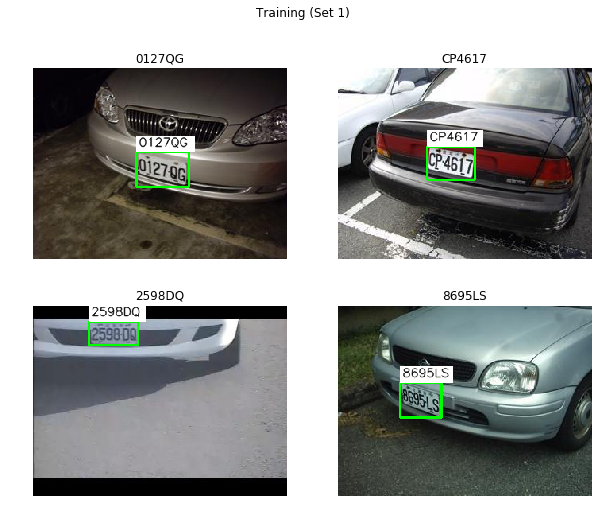

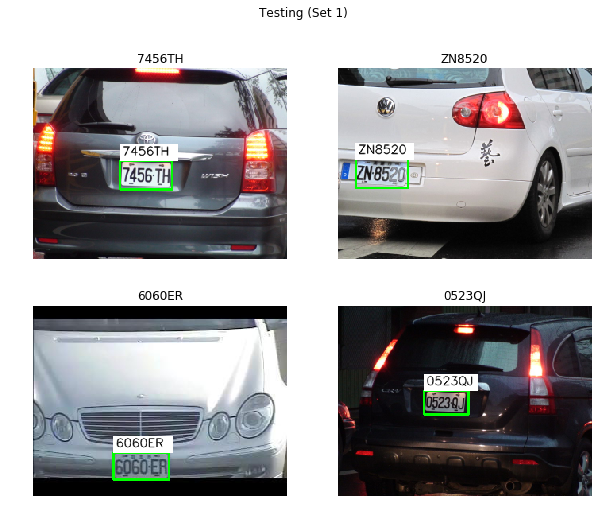

In [7]:
visualize_dataset(xtrain, ytrain, "Training (Set 1)")
visualize_dataset(xtest, ytest, "Testing (Set 1)")

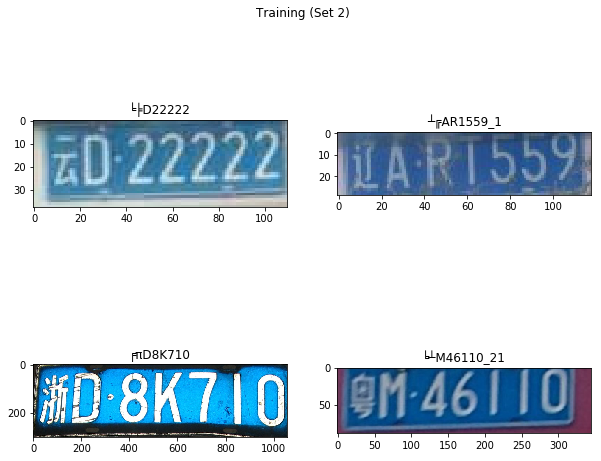

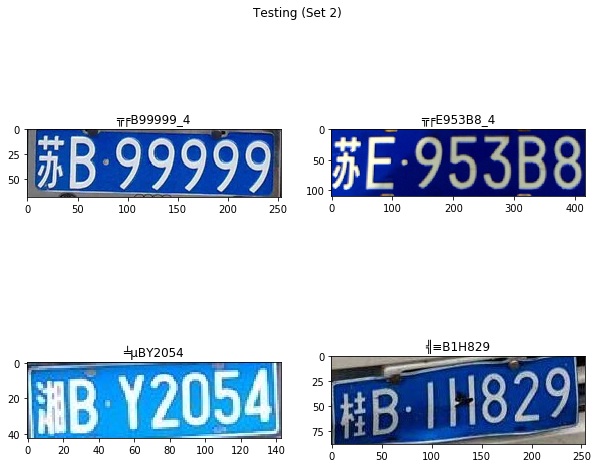

In [8]:
visualize_dataset(xtrain2, ytrain2, "Training (Set 2)", show_boxes=False)
visualize_dataset(xtest2, ytest2, "Testing (Set 2)", show_boxes = False)

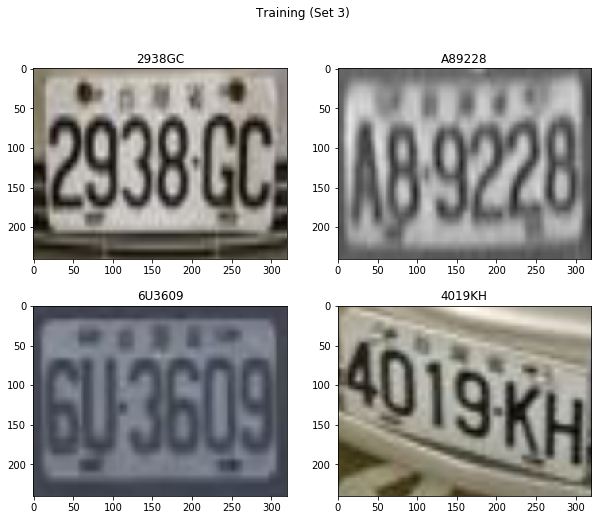

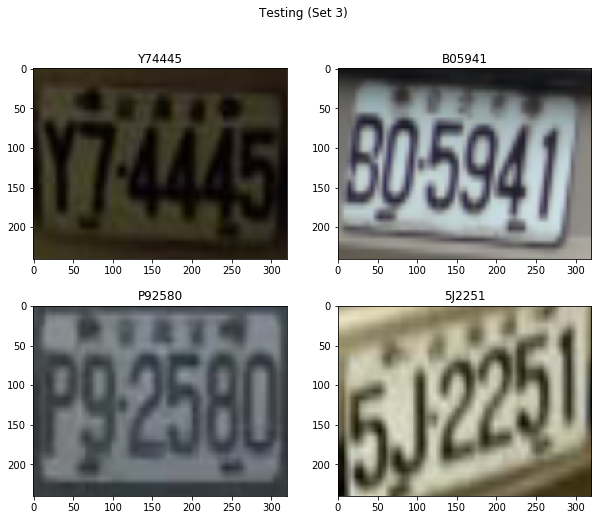

In [9]:
visualize_dataset(xtrain3, ytrain3, "Training (Set 3)", show_boxes=False)
visualize_dataset(xtest3, ytest3, "Testing (Set 3)", show_boxes = False)